In [239]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [240]:
# load data into pandas dataframe
soccerData = pd.read_csv('../data/raw/spi_matches.csv', index_col='season')
soccerData = soccerData.dropna()
soccerData

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
season,,,,,,,,,,,,,,,,,,,,,
2016,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
2016,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2016,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
2016,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
2016,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2020-10-03,1869,Spanish Primera Division,Real Valladolid,Eibar,65.35,65.64,0.4143,0.2715,0.3141,...,44.9,41.2,1.0,2.0,1.12,1.72,0.75,0.76,1.05,2.10
2020,2020-10-03,1846,German 2. Bundesliga,Jahn Regensburg,Karlsruher SC,30.62,32.25,0.3804,0.3372,0.2824,...,31.8,30.4,1.0,0.0,0.89,1.35,0.64,1.40,1.05,0.00
2020,2020-10-03,1846,German 2. Bundesliga,1. FC Heidenheim 1846,SC Paderborn,34.38,39.23,0.3489,0.3743,0.2769,...,22.6,29.5,0.0,0.0,1.40,1.02,1.16,0.96,0.00,0.00


Looking at the data description and distributions of the data to gain some insight for feature engineering. 

          league_id          spi1          spi2         prob1         prob2  \
count  16425.000000  16425.000000  16425.000000  16425.000000  16425.000000   
mean    2187.752755     54.639646     54.533021      0.455479      0.292448   
std      849.436888     17.166433     17.203349      0.158841      0.142349   
min     1818.000000     13.950000     14.590000      0.030700      0.003700   
25%     1846.000000     41.360000     41.110000      0.360200      0.203000   
50%     1869.000000     54.320000     54.200000      0.447200      0.276800   
75%     2105.000000     67.370000     67.190000      0.540300      0.360000   
max     5641.000000     96.570000     96.690000      0.977500      0.878100   

            probtie   proj_score1   proj_score2   importance1   importance2  \
count  16425.000000  16425.000000  16425.000000  16425.000000  16425.000000   
mean       0.252073      1.529703      1.146784     32.519428     31.790326   
std        0.048145      0.420299      0.412041    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febed9e9f40>]],
      dtype=object)

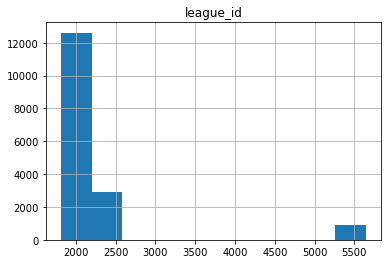

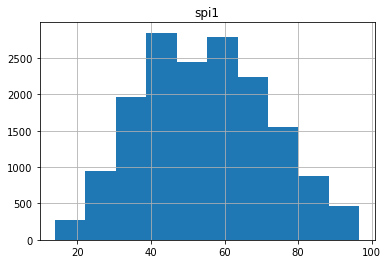

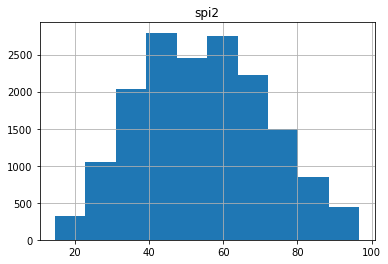

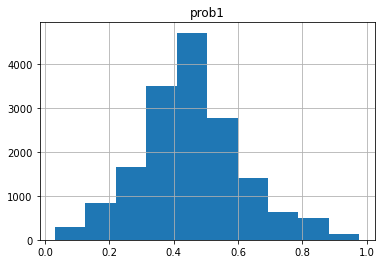

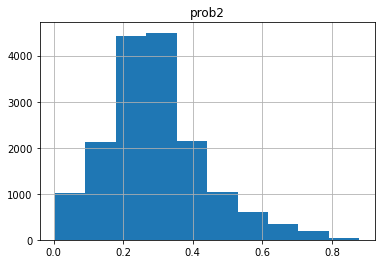

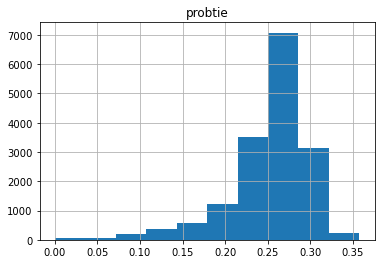

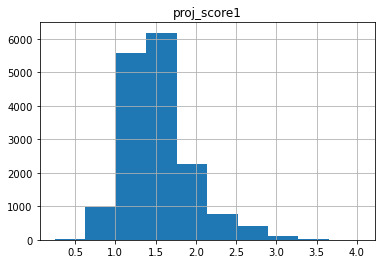

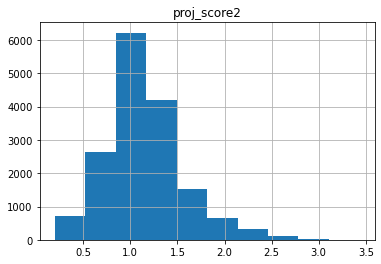

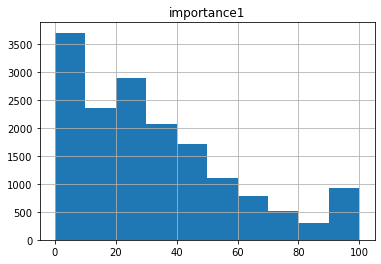

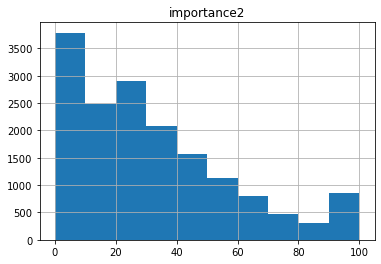

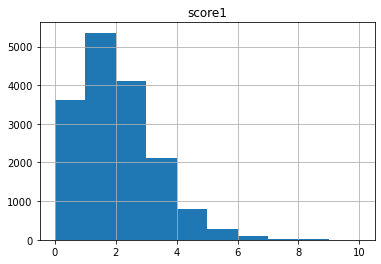

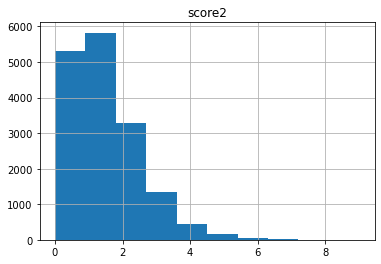

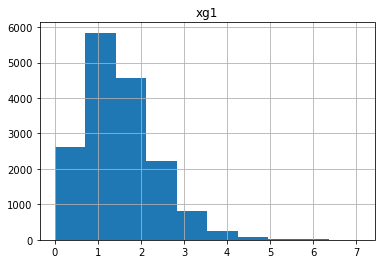

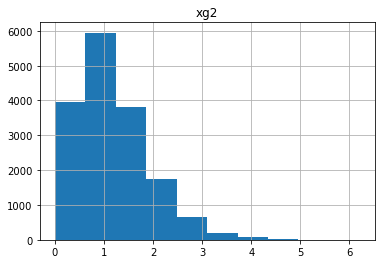

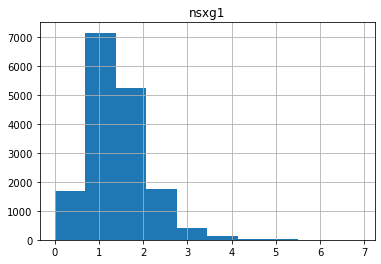

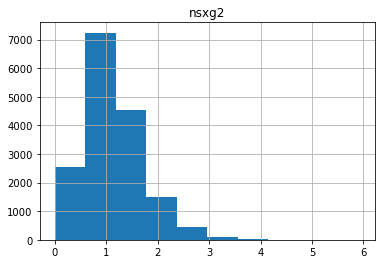

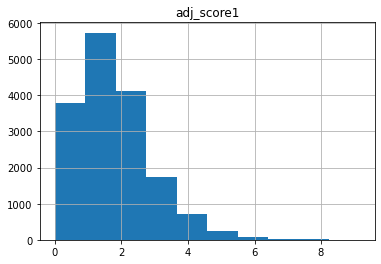

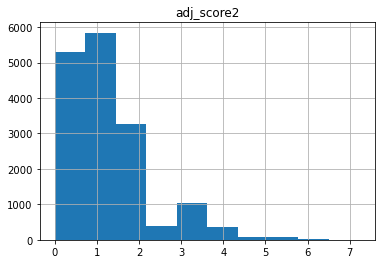

In [241]:
print(soccerData.describe())
soccerData.hist(column='league_id')
soccerData.hist(column='spi1')
soccerData.hist(column='spi2')
soccerData.hist(column='prob1')
soccerData.hist(column='prob2')
soccerData.hist(column='probtie')
soccerData.hist(column='proj_score1')
soccerData.hist(column='proj_score2')
soccerData.hist(column='importance1')
soccerData.hist(column='importance2')
soccerData.hist(column='score1')
soccerData.hist(column='score2')
soccerData.hist(column='xg1')
soccerData.hist(column='xg2')
soccerData.hist(column='nsxg1')
soccerData.hist(column='nsxg2')
soccerData.hist(column='adj_score1')
soccerData.hist(column='adj_score2')




To gain extra information from the data. I am going to split the date into month and day features. Then I am going to delete the date feature since all of its data will be contained within season, day, and month.

In [242]:
soccerData['date'] = pd.to_datetime(soccerData.date, format="%Y-%m-%d")
soccerData['month'] = soccerData['date'].dt.month
soccerData['day'] = soccerData['date'].dt.day
soccerData = soccerData.drop('date',1)
soccerData

,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,...,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,month,day
season,,,,,,,,,,,,,,,,,,,,,
2016,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,0.91,...,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05,8,12
2016,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,1.82,...,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10,8,12
2016,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,1.16,...,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05,8,13
2016,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,1.35,...,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05,8,13
2016,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,1.47,...,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,1869,Spanish Primera Division,Real Valladolid,Eibar,65.35,65.64,0.4143,0.2715,0.3141,1.14,...,1.0,2.0,1.12,1.72,0.75,0.76,1.05,2.10,10,3
2020,1846,German 2. Bundesliga,Jahn Regensburg,Karlsruher SC,30.62,32.25,0.3804,0.3372,0.2824,1.42,...,1.0,0.0,0.89,1.35,0.64,1.40,1.05,0.00,10,3
2020,1846,German 2. Bundesliga,1. FC Heidenheim 1846,SC Paderborn,34.38,39.23,0.3489,0.3743,0.2769,1.39,...,0.0,0.0,1.40,1.02,1.16,0.96,0.00,0.00,10,3


Now, I will encode league, team1, and team 2 so they will be ready to use in regression models. I also rearrange columns for easiers usage of the range operator.

In [243]:
encodeLeague = preprocessing.LabelEncoder()
encodeLeague.fit(soccerData.iloc[:, 1].values)
league = encodeLeague.transform(soccerData.iloc[:, 1].values)
soccerData['league'] = league

encodeT1 = preprocessing.LabelEncoder()
encodeT1.fit(soccerData.iloc[:, 2].values)
T1 = encodeT1.transform(soccerData.iloc[:, 2].values)
encodeT1.fit(soccerData.iloc[:, 3].values)
T2 = encodeT1.transform(soccerData.iloc[:, 3].values)
soccerData['team1'] = T1
soccerData['team2'] = T2
soccerData = soccerData[['month','day','league_id', 'league', 'team1', 'team2', 'spi1', 'spi2', 'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2', 'importance1', 'importance2', 'xg1', 'xg2', 'nsxg1', 'nsxg2', 'adj_score1', 'adj_score2', 'score1','score2']]
soccerData

,month,day,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,score1,score2
season,,,,,,,,,,,,,,,,,,,,,
2016,8,12,1843,7,48,293,51.16,85.68,0.0463,0.8380,...,32.4,67.7,0.97,0.63,0.43,0.45,0.00,1.05,0.0,1.0
2016,8,12,1843,7,10,191,68.85,56.48,0.5714,0.1669,...,53.7,22.9,2.45,0.77,1.75,0.42,2.10,2.10,2.0,2.0
2016,8,13,2411,2,205,227,53.57,66.81,0.3459,0.3621,...,38.1,22.2,0.85,2.77,0.17,1.25,2.10,1.05,2.0,1.0
2016,8,13,2411,2,115,426,55.19,58.66,0.4214,0.2939,...,43.6,34.6,1.11,0.68,0.84,1.60,0.00,1.05,0.0,1.0
2016,8,13,2411,2,136,394,68.02,73.25,0.3910,0.3401,...,31.9,48.0,0.73,1.11,0.88,1.81,1.05,1.05,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,10,3,1869,16,321,126,65.35,65.64,0.4143,0.2715,...,44.9,41.2,1.12,1.72,0.75,0.76,1.05,2.10,1.0,2.0
2020,10,3,1846,8,213,218,30.62,32.25,0.3804,0.3372,...,31.8,30.4,0.89,1.35,0.64,1.40,1.05,0.00,1.0,0.0
2020,10,3,1846,8,0,332,34.38,39.23,0.3489,0.3743,...,22.6,29.5,1.40,1.02,1.16,0.96,0.00,0.00,0.0,0.0


I am splitting data into features and labels then splitting the features and labels into training and testing sets. I am making 80% training and 20% of the data testing for both the features and labels. This will be my training and testing data which I use in my regression models. 

In [244]:
# spliting into features and labels (the label in this case is score1)
attributes = soccerData.iloc[:, 0:21].values
labels = soccerData.iloc[:, 21].values
#spliting into training and testing 
Atr_train, Atr_test, label_train, label_test = train_test_split(attributes, labels, test_size=0.2, random_state=0)

# spliting into features and labels (the label in this case is score2)
attributes2 = soccerData.iloc[:, 0:21].values
labels2 = soccerData.iloc[:, 22].values
#spliting into training and testing 
Atr_train2, Atr_test2, label_train2, label_test2 = train_test_split(attributes2, labels2, test_size=0.2, random_state=0)


The first model I am going to use is a Random Forest Regressor which is an enseble method using multiple regression trees. It takes the average of all the regression trees outputs. I train the Random forest on the training data then I have it predict the values given the testing features. I then take the mean squared error of the prediction based off of the test data and the actual score. I run this for score1 and score2. As you can see the mean squared error is very low for both scores. The model does a great job of predicting the scores. I run the randomforestregressor for multiple values of n_estimator. Setting the n_estimator larger than 15 has a diminishing decrease in the mean_squared error.

In [245]:
forest = RandomForestRegressor(n_estimators=15, random_state=0)
forest.fit(Atr_train, label_train)
label_pred = forest.predict(Atr_test)

# prints out the mse of predicting score1
print("Score1 MSE: ", mean_squared_error(label_test, label_pred))

forest2 = RandomForestRegressor(n_estimators=15, random_state=0)
forest2.fit(Atr_train2, label_train2)
label_pred2 = forest2.predict(Atr_test2)

# prints out the mse of predicting score2
print("Score2 MSE: ", mean_squared_error(label_test2, label_pred2))

Score1 MSE:  0.00819347201082361
Score2 MSE:  0.004828682563842381


In [246]:
forest = RandomForestRegressor(n_estimators=50, random_state=0)
forest.fit(Atr_train, label_train)
label_pred = forest.predict(Atr_test)

# prints out the mse of predicting score1
print("Score1 MSE: ", mean_squared_error(label_test, label_pred))

forest2 = RandomForestRegressor(n_estimators=50, random_state=0)
forest2.fit(Atr_train2, label_train2)
label_pred2 = forest2.predict(Atr_test2)

# prints out the mse of predicting score2
print("Score2 MSE: ", mean_squared_error(label_test2, label_pred2))

Score1 MSE:  0.007791537290715373
Score2 MSE:  0.004797077625570777


In [247]:
forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(Atr_train, label_train)
label_pred = forest.predict(Atr_test)

# prints out the mse of predicting score1
print("Score1 MSE: ", mean_squared_error(label_test, label_pred))

forest2 = RandomForestRegressor(n_estimators=100, random_state=0)
forest2.fit(Atr_train2, label_train2)
label_pred2 = forest2.predict(Atr_test2)

# prints out the mse of predicting score2
print("Score2 MSE: ", mean_squared_error(label_test2, label_pred2))

Score1 MSE:  0.007501674277016743
Score2 MSE:  0.004645357686453577


Here, I use another ensemble method called gradient boosting. It seeks to optimize a loss function. In this case, it is using a least squares regression as its loss function. I did gradient boosting for three different numbers of boostin stages. Setting n_estimator to 50 gave an error almost the same as when set to 100. Computationaly, setting n_estimator to 50 would be a better choice since the change from 50 to 100 is negligible. Gradient boosting performed slightly better than the random forest regression. 

In [251]:
gBoost=GradientBoostingRegressor(n_estimators=15) 
gBoost.fit(Atr_train, label_train)
label_pred = gBoost.predict(Atr_test)
print("Score1 MSE: ", mean_squared_error(label_test, label_pred))

gBoost2=GradientBoostingRegressor(n_estimators=15) 
gBoost2.fit(Atr_train2, label_train2)
label_pred2 = gBoost2.predict(Atr_test2)
print("Score2 MSE: ", mean_squared_error(label_test2, label_pred2))

Score1 MSE:  0.07830674898144577
Score2 MSE:  0.05963961782388428


In [252]:
gBoost=GradientBoostingRegressor(n_estimators=50) 
gBoost.fit(Atr_train, label_train)
label_pred = gBoost.predict(Atr_test)
print("Score1 MSE: ", mean_squared_error(label_test, label_pred))

gBoost2=GradientBoostingRegressor(n_estimators=50) 
gBoost2.fit(Atr_train2, label_train2)
label_pred2 = gBoost2.predict(Atr_test2)
print("Score2 MSE: ", mean_squared_error(label_test2, label_pred2))

Score1 MSE:  0.006678367637496843
Score2 MSE:  0.0042427412072204235


In [253]:
gBoost=GradientBoostingRegressor(n_estimators=100) 
gBoost.fit(Atr_train, label_train)
label_pred = gBoost.predict(Atr_test)
print("Score1 MSE: ", mean_squared_error(label_test, label_pred))

gBoost2=GradientBoostingRegressor(n_estimators=100) 
gBoost2.fit(Atr_train2, label_train2)
label_pred2 = gBoost2.predict(Atr_test2)
print("Score2 MSE: ", mean_squared_error(label_test2, label_pred2))

Score1 MSE:  0.006557862100812851
Score2 MSE:  0.0042006208659478095
